In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Part 1: Prepare the Data #

In [7]:
df = pd.read_csv("C:/Users/user/Documents/challenges_project/machine_learning_challenge/challenge9_unsupervised_ml/myopia.csv",sep=';')
df

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,0.678,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,615,1993,0,6,1,0.665,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,616,1995,0,6,0,1.834,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,617,1991,0,6,1,0.665,21.92,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [8]:
data = df.drop(columns='MYOPIC')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         618 non-null    int64  
 1   STUDYYEAR  618 non-null    int64  
 2   AGE        618 non-null    int64  
 3   GENDER     618 non-null    int64  
 4   SPHEQ      618 non-null    float64
 5   AL         618 non-null    float64
 6   ACD        618 non-null    float64
 7   LT         618 non-null    float64
 8   VCD        618 non-null    float64
 9   SPORTHR    618 non-null    int64  
 10  READHR     618 non-null    int64  
 11  COMPHR     618 non-null    int64  
 12  STUDYHR    618 non-null    int64  
 13  TVHR       618 non-null    int64  
 14  DIOPTERHR  618 non-null    int64  
 15  MOMMY      618 non-null    int64  
 16  DADMY      618 non-null    int64  
dtypes: float64(5), int64(12)
memory usage: 82.2 KB


In [9]:
data_scaled = StandardScaler().fit_transform(data)

# Part 2: Apply Dimensionality Reduction #

In [13]:
pca = PCA(n_components=0.9)
pca_data = pca.fit_transform(data_scaled)
pca_data.shape

(618, 12)

number of features was reduced from 16 to 12

In [14]:
tsne = TSNE(learning_rate=40)
data_tsne = tsne.fit_transform(pca_data)
data_tsne.shape

(618, 2)

The number of features was reduced from 12 to 2.

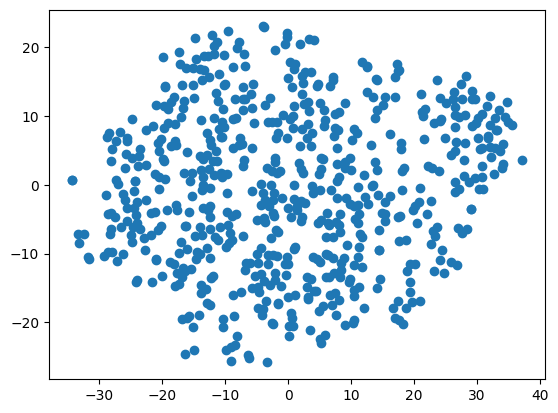

In [15]:
X = data_tsne[:,0]
y = data_tsne[:,1]
plt.scatter(X, y)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means #

In [16]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data_tsne)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,254323.546875
1,2,132185.265625
2,3,94308.781250
3,4,61956.750000
4,5,49952.644531


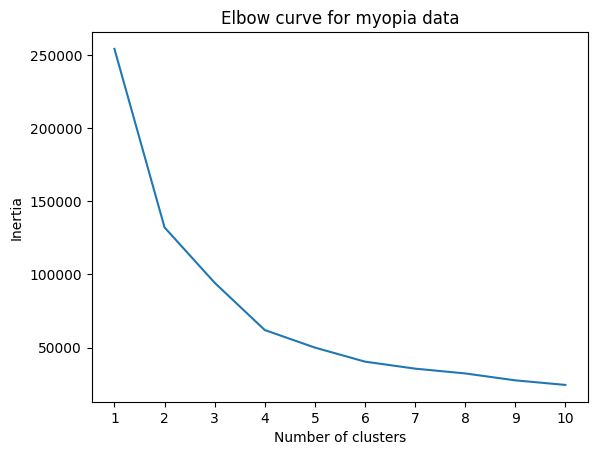

In [17]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

# Part 4:Recommendation #
###### Can the patients be clustered? If so, into how many clusters? ######

Based on the PCA and t-SNE visualizations, the patients can be grouped into distinct clusters. The K-means elbow method and silhouette analysis suggest that the data is best represented by 3 clusters. Therefore, the patients can indeed be clustered, and analyzing these three subgroups separately may help improve the myopia prediction models.